# 04다중클래스분류_callback을이용한_최고성능모델 저장

In [1]:
# 기본 모듈들
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 훈련셋
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# 분석
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# 시퀀셜

#
import os

2025-05-15 14:25:34.872428: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-15 14:25:34.899194: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747286734.928338   20268 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747286734.935314   20268 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747286734.953595   20268 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
data = pd.read_csv("./data/winequality-white.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.info() # 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
data['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [6]:
X= data.drop('quality', axis=1)
y = data['quality']

In [19]:
X # 독립변수 들어갔는지

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [20]:
y # 클래스가 몇개인지 - 1핫인코딩 해야하는지 알수있음

,3,4,5,6,7,8,9
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
4893,False,False,False,True,False,False,False
4894,False,False,True,False,False,False,False
4895,False,False,False,True,False,False,False
4896,False,False,False,False,True,False,False


In [7]:
y=pd.get_dummies(y) # 어떤 클래스인지 알기위해 드롭주면 안됨
y

,3,4,5,6,7,8,9
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
4893,False,False,False,True,False,False,False
4894,False,False,True,False,False,False,False
4895,False,False,False,True,False,False,False
4896,False,False,False,False,True,False,False


In [8]:
data['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [9]:
# 데이터 홀드아웃

X_train, X_valid, y_train, y_valid= train_test_split(X,y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5 , stratify=y_valid, random_state=42)



In [10]:
# 분석전 스케일링
rs = RobustScaler()
train_temp = rs.fit_transform(X_train)
valid_temp = rs.transform(X_valid)
test_temp = rs.transform(X_test)
rs_X_train = pd.DataFrame(train_temp, columns=X_train.columns, index=X_train.index)
rs_X_valid = pd.DataFrame(valid_temp, columns=X_valid.columns, index=X_valid.index)
rs_X_test = pd.DataFrame(test_temp, columns=X_test.columns, index=X_test.index)



In [12]:
# 클래스 개수
y_train.shape[1]

7

# 모델성능 최고시점을 저장+중지

In [11]:
## 시퀀셜- 모듈

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint



In [22]:
#클래스 개수를 세어
len(data['quality'].unique())

7

In [14]:
##시퀀셜
#클래스 개수 가지게 끔
n_class=y_train.shape[1]

model = Sequential()   
model.add(Input(shape=(rs_X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(n_class, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,495 (13.65 KB)

 Trainable params: 3,495 (13.65 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.3646 - loss: 1.7192 - val_accuracy: 0.5184 - val_loss: 1.2996
Epoch 2/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5146 - loss: 1.2463 - val_accuracy: 0.5276 - val_loss: 1.2093
Epoch 3/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5429 - loss: 1.1549 - val_accuracy: 0.5439 - val_loss: 1.1617
Epoch 4/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5398 - loss: 1.1238 - val_accuracy: 0.5347 - val_loss: 1.1336
Epoch 5/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5517 - loss: 1.0957 - val_accuracy: 0.5367 - val_loss: 1.1153
Epoch 6/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5507 - loss: 1.0526 - val_accuracy: 0.5510 - val_loss: 1.1039
Epoch 7/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5538 - loss: 1.0424 - val_accuracy: 0.5653 - val_loss: 1.0864
Epoch 8/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5629 - loss: 1.0413 - val_accuracy: 

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6977 - loss: 0.7663 - val_accuracy: 0.5602 - val_loss: 1.1039
Epoch 52/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6831 - loss: 0.7669 - val_accuracy: 0.5459 - val_loss: 1.0855
Epoch 53/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7041 - loss: 0.7475 - val_accuracy: 0.5429 - val_loss: 1.1036
Epoch 54/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7009 - loss: 0.7671 - val_accuracy: 0.5673 - val_loss: 1.0905
Epoch 55/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7109 - loss: 0.7460 - val_accuracy: 0.5459 - val_loss: 1.0970
Epoch 56/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7154 - loss: 0.7317 - val_accuracy: 0.5633 - val_loss: 1.1016
Epoch 57/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7124 - loss: 0.7277 - val_accuracy: 0.5571 - val_loss: 1.0971
Epoch 58/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7013 - loss: 0.7587 - val_accuracy: 0.5408 -

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7743 - loss: 0.5890 - val_accuracy: 0.5622 - val_loss: 1.2757
Epoch 102/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7643 - loss: 0.6005 - val_accuracy: 0.5745 - val_loss: 1.2850
Epoch 103/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7818 - loss: 0.5983 - val_accuracy: 0.5745 - val_loss: 1.2903
Epoch 104/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7753 - loss: 0.5904 - val_accuracy: 0.5786 - val_loss: 1.2835
Epoch 105/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7830 - loss: 0.5705 - val_accuracy: 0.5633 - val_loss: 1.3260
Epoch 106/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7788 - loss: 0.5811 - val_accuracy: 0.5684 - val_loss: 1.3209
Epoch 107/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7754 - loss: 0.5823 - val_accuracy: 0.5653 - val_loss: 1.3227
Epoch 108/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7856 - loss: 0.5811 - val_accuracy: 0

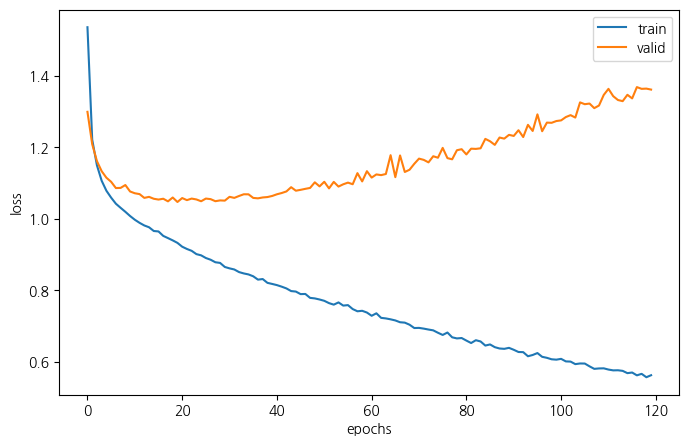

In [15]:
## 컴파일
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy']) 
early_stop= EarlyStopping(patience=100) #50번반복후 멈춤(무의미한반복일때)

# 모델이 저장될 디렉토리(model)에 관여하는 매서드 os
os.makedirs("./model", exist_ok=True) # 디렉토리 자동생성
filepath = "./model/whitewine_loss_{val_loss:.4f}_epoch_{epoch:04d}__.keras"
model_save = ModelCheckpoint(filepath=filepath, save_best_only=True) # save_best_only를 주지않으면 여러개 저장됨

# 히스토리
history = model.fit(rs_X_train, y_train,
                   epochs=1000, batch_size=32,
                   validation_data=(rs_X_valid, y_valid),
                   callbacks=[early_stop, model_save]) # 아까는 없었던 부분

# 피규어
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'valid'])
plt.show()

# 데이터증폭이 필요한 상황 - 스케일링 한건지는 어떻게 알지???
- 증폭한 후 스케일러로 스케일링 

In [16]:
# 데이터의 불균등
data['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [19]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)


In [9]:
# 데이터 홀드아웃

X_train, X_valid, y_train, y_valid= train_test_split(X,y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5 , stratify=y_valid, random_state=42)



In [ ]:
# 증폭할 데이터 (스케일링 전) 체크
X_train

In [21]:
## 증폭
#1. 숫자형y로 SMOTE적용
smt= SMOTE(n_jobs=-1, random_state=42)
smt_X_train, smt_y_train = smt.fit_resample(X_train, y_train)

# 2. DataFrame 변환시 인덱스 재설정
smt_X_train = pd.DataFrame(smt_X_train, columns=X_train.columns, index=X_train.index)
smt_y_train = pd.DataFrame(smt_y_train, columns=y_train.columns, index=y_train.index)

# 3.모델용 1핫인코딩
from tensorflow.keras.utils import to_categorical
smt_y_train_cat= to_categorical(smt_y_train)

AttributeError: 'DataFrame' object has no attribute 'argmax'

In [ ]:
# 증폭 후 결과 확인
smt_y_train.value_counts()

In [10]:
# 스케일링
rs = RobustScaler()
train_temp = rs.fit_transform(X_train)
valid_temp = rs.transform(X_valid)
test_temp = rs.transform(X_test)
rs_X_train = pd.DataFrame(train_temp, columns=X_train.columns, index=X_train.index)
rs_X_valid = pd.DataFrame(valid_temp, columns=X_valid.columns, index=X_valid.index)
rs_X_test = pd.DataFrame(test_temp, columns=X_test.columns, index=X_test.index)



In [ ]:
# 원핫인코딩
ot_smt_y_train=pd.get_dummies(smt_y_train)

In [ ]:
# 원핫인코딩
y_valid=pd.get_dummies(y_valid)
y_test=pd.get_dummies(y_test)

In [ ]:
# 인코딩까지 마쳤으니 이제 처음시작부터 다시 돌릴때 바꾼값들 넣어서 돌리기

In [11]:
## 시퀀셜- 매서드들

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [14]:
##시퀀셜
#클래스 개수 가지게 끔
n_class=ot_smt_y_train.shape[1]

model = Sequential()   
model.add(Input(shape=(smt_X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(n_class, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,495 (13.65 KB)

 Trainable params: 3,495 (13.65 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.3646 - loss: 1.7192 - val_accuracy: 0.5184 - val_loss: 1.2996
Epoch 2/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5146 - loss: 1.2463 - val_accuracy: 0.5276 - val_loss: 1.2093
Epoch 3/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5429 - loss: 1.1549 - val_accuracy: 0.5439 - val_loss: 1.1617
Epoch 4/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5398 - loss: 1.1238 - val_accuracy: 0.5347 - val_loss: 1.1336
Epoch 5/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5517 - loss: 1.0957 - val_accuracy: 0.5367 - val_loss: 1.1153
Epoch 6/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5507 - loss: 1.0526 - val_accuracy: 0.5510 - val_loss: 1.1039
Epoch 7/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5538 - loss: 1.0424 - val_accuracy: 0.5653 - val_loss: 1.0864
Epoch 8/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5629 - loss: 1.0413 - val_accuracy: 

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7743 - loss: 0.5890 - val_accuracy: 0.5622 - val_loss: 1.2757
Epoch 102/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7643 - loss: 0.6005 - val_accuracy: 0.5745 - val_loss: 1.2850
Epoch 103/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7818 - loss: 0.5983 - val_accuracy: 0.5745 - val_loss: 1.2903
Epoch 104/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7753 - loss: 0.5904 - val_accuracy: 0.5786 - val_loss: 1.2835
Epoch 105/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7830 - loss: 0.5705 - val_accuracy: 0.5633 - val_loss: 1.3260
Epoch 106/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7788 - loss: 0.5811 - val_accuracy: 0.5684 - val_loss: 1.3209
Epoch 107/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7754 - loss: 0.5823 - val_accuracy: 0.5653 - val_loss: 1.3227
Epoch 108/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7856 - loss: 0.5811 - val_accuracy: 0

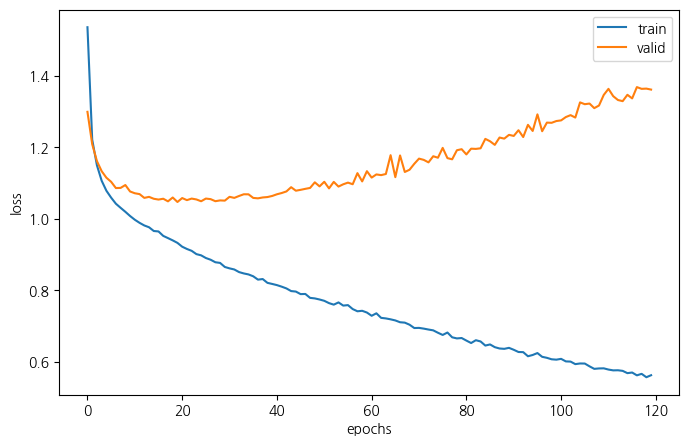

In [15]:
## 컴파일
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy']) 
early_stop= EarlyStopping(patience=100) #50번반복후 멈춤(무의미한반복일때)

# 모델이 저장될 디렉토리(model)에 관여하는 매서드 os
os.makedirs("./model", exist_ok=True) # 디렉토리 자동생성True
filepath = "./model/whitewine_loss_{val_loss:.4f}_epoch_{epoch:04d}__.keras"
model_save = ModelCheckpoint(filepath=filepath, save_best_only=True) # save_best_only를 주지않으면 여러개 저장됨

# 히스토리----------증폭+스케일링 한 경우들만 바꿔주기
history = model.fit(rs_X_train, ot_smt_y_train,
                   epochs=1000, batch_size=32,
                   validation_data=(rs_X_valid, y_valid),
                   callbacks=[early_stop, model_save]) # 아까는 없었던 부분

# 피규어
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'valid'])
plt.show()

# 저장된 best모델 불러와 쓰기

In [22]:
rs_X_test # 아까 만들어둔 테스트모델(개수980개)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
606,0.454545,-0.090909,-0.250000,0.280488,0.428571,0.181818,0.383333,0.622478,1.30,-0.714286,-0.421053
235,0.363636,-0.272727,0.500000,1.109756,1.071429,0.954545,0.983333,0.945245,-0.40,-0.285714,-0.736842
2886,-0.181818,1.363636,-0.083333,-0.439024,-0.071429,-0.727273,-0.566667,-0.426513,-0.20,-0.500000,0.052632
3590,-0.181818,-0.636364,0.250000,-0.451220,-0.428571,0.136364,-0.466667,-0.862248,0.05,1.428571,0.842105
4127,-0.090909,0.454545,0.166667,0.195122,1.142857,0.772727,1.333333,0.364265,0.80,0.571429,-0.052632
...,...,...,...,...,...,...,...,...,...,...,...
3178,0.727273,-1.000000,0.250000,-0.109756,0.571429,-0.500000,-0.616667,0.096830,-0.35,-0.285714,-0.473684
618,0.818182,-0.181818,-0.416667,-0.414634,0.571429,0.818182,0.916667,-0.230548,0.30,0.142857,0.210526
2102,-0.545455,0.727273,-0.166667,0.719512,0.285714,-0.272727,1.700000,0.991354,0.05,0.071429,-0.894737
2695,-1.000000,-0.272727,-0.333333,0.542683,-1.285714,-0.363636,-0.233333,-0.299712,0.55,-0.714286,0.473684


In [23]:
y_test

,3,4,5,6,7,8,9
606,False,False,True,False,False,False,False
235,False,False,False,True,False,False,False
2886,False,False,True,False,False,False,False
3590,False,False,False,False,True,False,False
4127,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
3178,False,False,False,True,False,False,False
618,False,False,False,True,False,False,False
2102,False,False,True,False,False,False,False
2695,False,False,False,True,False,False,False


In [24]:
# 모듈 깔고
from keras.models import load_model

In [25]:
# 저장되었던 것 로드
best_model = load_model("./model/whitewine_loss_1.0475_epoch_0020__.keras")
wine_pred= best_model.predict(rs_X_test)
wine_pred = pd.DataFrame(wine_pred, columns=y_test.columns)
wine_pred

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


,3,4,5,6,7,8,9
0,0.008884,0.023835,0.419805,0.483857,0.052656,0.009675,0.001288
1,0.004876,0.004802,0.414859,0.454102,0.110841,0.010220,0.000299
2,0.004912,0.139269,0.502439,0.341168,0.009215,0.002665,0.000332
3,0.000858,0.002079,0.017021,0.399016,0.517993,0.062506,0.000527
4,0.018573,0.034644,0.408294,0.471699,0.051783,0.010402,0.004605
...,...,...,...,...,...,...,...
975,0.003111,0.012893,0.272672,0.503947,0.196677,0.010041,0.000658
976,0.004413,0.004404,0.178030,0.758569,0.045973,0.005913,0.002698
977,0.002322,0.011478,0.656009,0.325425,0.004033,0.000646,0.000087
978,0.001791,0.003674,0.039951,0.391638,0.435546,0.126579,0.000821


In [26]:
# 더정확하게
best_model.evaluate(rs_X_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5548 - loss: 1.0786


[1.0464918613433838, 0.5653061270713806]

- 저장한 모델 용량초과될수있음
- cmd에서 code . 으로 vscode창열고
- gitignore에 아래와같이 저장
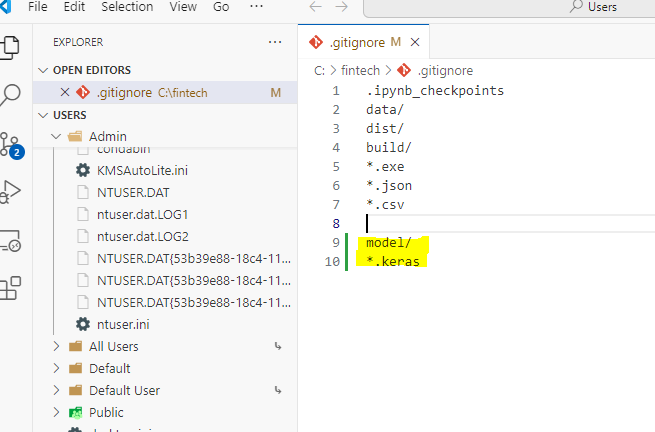

# 05로